# GRIP : The Spark Foundation (Data Science and Business Analytics Intern)
# Batch : July 2021
## Author : V Sureshkumar
## **Task - 1 (Prediction using Supervised ML)**


## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

**This is a simple linear regression task as it involves just 2 variables.**

Simple Linear Regression is a statistical method to find relationship between two continuous variables. Out of the two variables present, one is independent variable and the other is dependent variable. Statistical relationship is not accurate in determining relationship between two variables. 

**Cases to Prediction -**
- 1.Predict the percentage of an student based on the no. of study hours.
- 2.What will be predicted score if a student studies for 9.25 hrs/ day?


***Importing all Required Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

***Reading the Dataset***

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print('Data Imported Successful ')
df.head()

Data Imported Successful 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***Data's coloum and it's type***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There is no null values in the dataset so we can visualizing the data

### PLOTTING THE DATASET

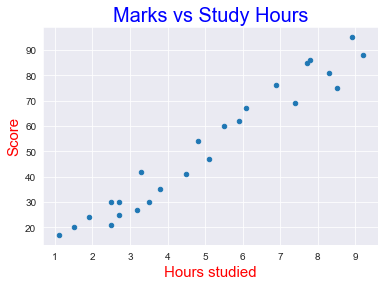

In [4]:
sns.set_style('darkgrid')
df.plot(kind='scatter',x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied',size=15,color = 'r')
plt.ylabel('Score',size=15,color = 'r')
plt.title('Marks vs Study Hours',size=20,color = 'b')
plt.show()

***We can see there is a correlation between "Score" and "Hours studied", So we use linear regression line n above graph*** 

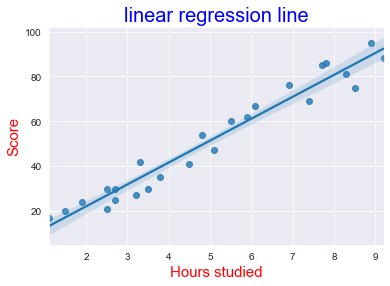

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.xlabel('Hours studied',size=15,color = 'r')
plt.ylabel('Score',size=15,color = 'r')
plt.title('linear regression line',size=20,color = 'b')
plt.show()
print(df.corr())

From the graph above, we can clearly see that there is a positive correlation between the number of hours studied and percentage of score.

# Preparing the data

In [6]:
# Defining variables A and B from the Dataset
X = df.iloc[:, :-1].values # hours
y = df.iloc[:, 1].values # Scores

# Split the Dataset into two parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the Algorithm

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [8]:
# Finding out INTERCEPT value and LINEAR Coefficient

print('Intercept value is:', regressor.intercept_)
print('Linear cofficient is :' , regressor.coef_)

Intercept value is: 2.0181600414346974
Linear cofficient is : [9.91065648]


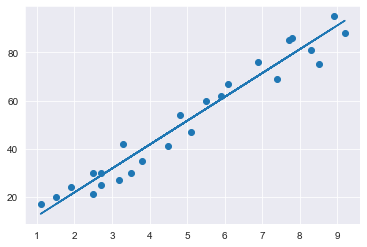

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [10]:
y_pred = regressor.predict(X_test) # Predicting the scores regaring to the no.of hours study
Predicted_marks_vs_hours = pd.DataFrame({'Study Hours': [i[0] for i in X_test], 'Predicted Marks': [j for j in y_pred]})
Predicted_marks_vs_hours

,Study Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [11]:
# Comparing with Actual Data
comparison_of_scores = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred})
comparison_of_scores

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***WE COMPARE THE PREDICTED MARKS WITH THE ACTUAL MARKS USING THE DATA VISUALIZATION***

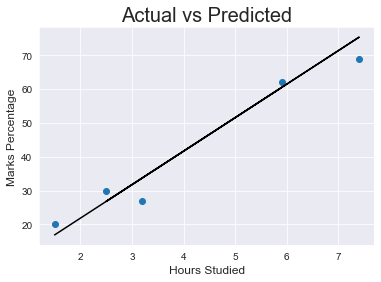

In [12]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [13]:
hours =  9.25
pred_score = regressor.predict([[hours]])
print('Number of hours =' ,hours)
print('Predicted Scores =' ,pred_score[0].round(4))

Number of hours = 9.25
Predicted Scores = 93.6917


## MODEL EVALUATION
### Calculate the accuracy of the model

In [14]:
print('Mean Absolute Error:', mean_absolute_error(y_test , y_pred))

Mean Absolute Error: 4.183859899002975


*As the value of the Mean Absolute Error is very small, it indicates that there is very less possibilities of errors throughout the model.*

## CONCLUSION
**Answer to the asked questions**

**1.Predict the percentage of an student based on the no. of study hours.**

In [15]:
Predicted_marks_vs_hours

,Study Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


**2.What will be predicted score if a student studies for 9.25 hrs/ day?**

In [16]:
print('Scores =' ,pred_score[0].round(4))

Scores = 93.6917
